In [1]:
import sys
import os
import torch
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

#For safe imports of everything
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)

#Global params
train_pct = 0.9

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### **English LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 1.7867 Test Loss: 1.8091 Train Accuracy 0.4782 Test Accuracy 0.482
Epoch: 2 Training Loss: 1.5262 Test Loss: 1.5781 Train Accuracy 0.5454 Test Accuracy 0.5427
Epoch: 3 Training Loss: 1.4099 Test Loss: 1.4911 Train Accuracy 0.5753 Test Accuracy 0.5665
Epoch: 4 Training Loss: 1.3316 Test Loss: 1.4446 Train Accuracy 0.5962 Test Accuracy 0.5821
Epoch: 5 Training Loss: 1.2848 Test Loss: 1.4187 Train Accuracy 0.609 Test Accuracy 0.5912
Epoch: 6 Training Loss: 1.2587 Test Loss: 1.4078 Train Accuracy 0.6158 Test Accuracy 0.5951
Epoch: 7 Training Loss: 1.2361 Test Loss: 1.4005 Train Accuracy 0.6218 Test Accuracy 0.5988
Epoch: 8 Training Loss: 1.2234 Test Loss: 1.4022 Train Accuracy 0.626 Test Accuracy 0.6013
Epoch: 9 Training Loss: 1.212 Test Loss: 1.4096 Train Accuracy 0.6291 Test Accuracy 0.6016
Epoch: 10 Training Loss: 1.1951 Test Loss: 1.4164 Train Accuracy 0.6346 Test Accuracy 0.6032
Epoch: 11 Training Loss: 1.1914 Test Loss: 1.4298 Train Accu

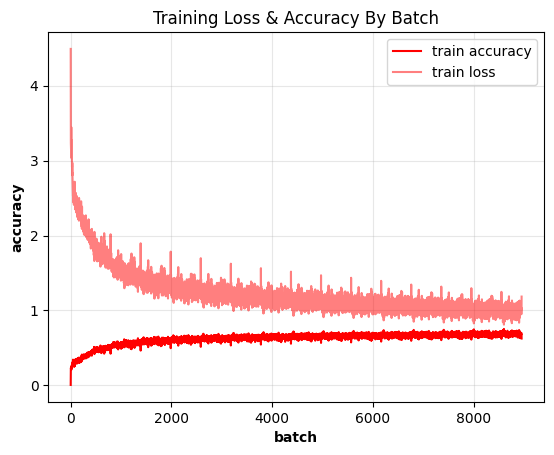

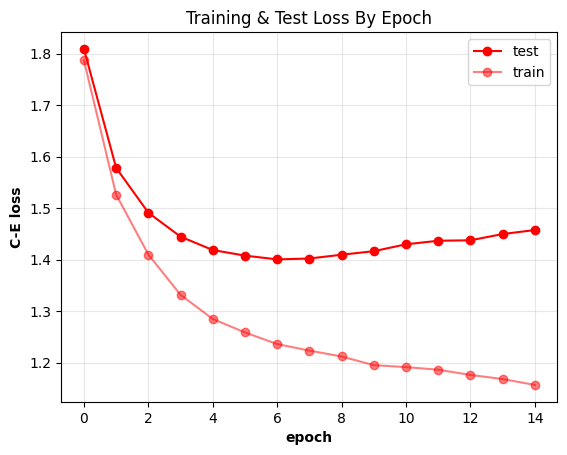

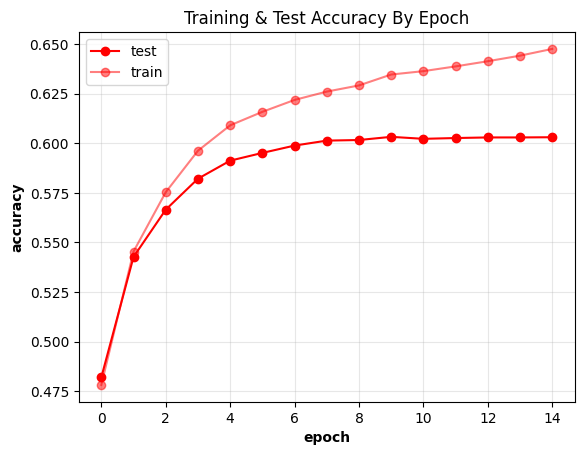

In [4]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfig

config = modelConfig()
train, test = createBatchTensor(train_pct, config)

model = transformerModel(config)
model.to(device)

model.trainModel(train, test)

**Testing the model**

In [6]:
from data.tokenizer import detokenize

print(detokenize(model.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=500).tolist()[0], config))


  TAMORA. Here holds you, here's my sweet brother;
    Why, what, how shining you that wherein the Prince.
  SATURNINUS. And not once?  
  FIRST ROSE. O surfeit on the baged Cress?  
  LUCIUS. Faith, rather in the hands of others, and for the Priamentinral
    Of Norfolk, and Lucius; by gifts Helen, I know him.  
  GOTH. And man, therefore doth, tell me, if thou anderve
    And not saucy in her Troilus.
  AARON. Madam, children, we are the boy of Baor.
  TITUS. Will me so, crow me to heaven the 


### **Morse LLM Model** ###

✔ Starting training...
Epoch: 1 Training Loss: 1.0171 Test Loss: 1.0352 Train Accuracy 0.4872 Test Accuracy 0.4932
Epoch: 2 Training Loss: 0.6968 Test Loss: 0.707 Train Accuracy 0.6644 Test Accuracy 0.6728
Epoch: 3 Training Loss: 0.6112 Test Loss: 0.6225 Train Accuracy 0.7109 Test Accuracy 0.7198
Epoch: 4 Training Loss: 0.5635 Test Loss: 0.5795 Train Accuracy 0.7362 Test Accuracy 0.7438
Epoch: 5 Training Loss: 0.5359 Test Loss: 0.5579 Train Accuracy 0.7498 Test Accuracy 0.7554
Epoch: 6 Training Loss: 0.5106 Test Loss: 0.5376 Train Accuracy 0.7624 Test Accuracy 0.7658
Epoch: 7 Training Loss: 0.4936 Test Loss: 0.5249 Train Accuracy 0.7709 Test Accuracy 0.773
Epoch: 8 Training Loss: 0.4829 Test Loss: 0.5169 Train Accuracy 0.7761 Test Accuracy 0.7778
Epoch: 9 Training Loss: 0.4773 Test Loss: 0.5149 Train Accuracy 0.779 Test Accuracy 0.7801
Epoch: 10 Training Loss: 0.4646 Test Loss: 0.5043 Train Accuracy 0.7851 Test Accuracy 0.7856
Epoch: 11 Training Loss: 0.4615 Test Loss: 0.503 Train Accu

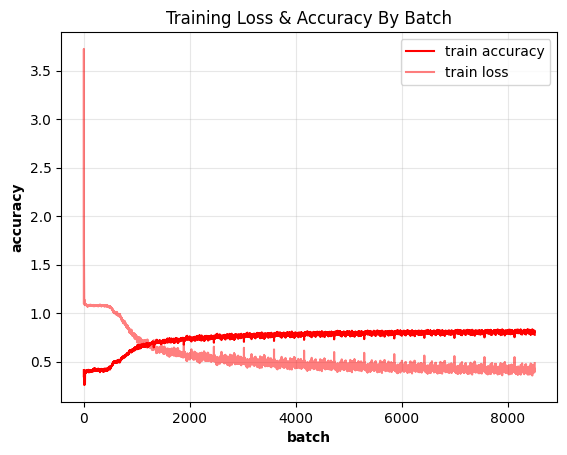

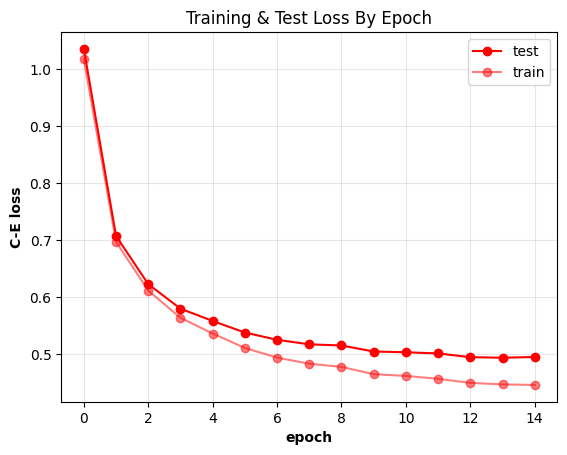

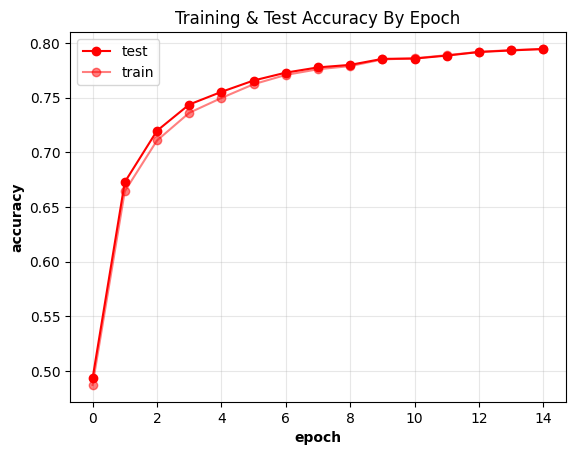

In [3]:
from data.data import createBatchTensor
from model.GPT import transformerModel
from config import modelConfigMorse

configm = modelConfigMorse()
train, test = createBatchTensor(train_pct, configm)

model_morse = transformerModel(configm)
model_morse.to(device)

model_morse.trainModel(train, test)

**Testing the model**

In [7]:
from data.morseconv import decrypt

print(decrypt(detokenize(model_morse.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=500).tolist()[0], configm)))

LLHELDOPPRESSWILLENDUCTITDEPAIRDWELLBYTHESEGOODSERVICEIHADTHEEEMRYDRESSDAMNDISLIKSD.HERETHOUHASTSUBTLESSLIBERIOUSWHICHLADIERA


In [8]:
model_morse.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=500).tolist()[0]

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,


In [13]:
from data.tokenizer import tokenize

print(tokenize("  .-", configm))

[0, 0, 1, 2]


In [14]:
print(decrypt("  .-"))

A


In [17]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '\n':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-', ' ' : ' '}

def encrypt(message):
    cipher = ''
    for letter in message:
        if letter != ' ':
 
            # Looks up the dictionary and adds the
            # corresponding morse code
            # along with a space to separate
            # morse codes for different characters
            try:
                cipher += MORSE_CODE_DICT[letter.upper()] + ' '
            except:
                cipher += '' #everything else is blank
        else:
            # 1 space indicates different characters
            # and 2 indicates different words
            cipher += ' '
 
    return cipher
 
# Function to decrypt the string
# from morse to english
def decrypt(message):
 
    # extra space added at the end to access the
    # last morse code
    message += ' '
 
    decipher = ''
    citext = ''
    for letter in message:
        i = 0
        # checks for space
        if (letter != ' '):
 
            # counter to keep track of space
            i = 0
 
            # storing morse code of a single character
            citext += letter
 
        # in case of space
        else:
            # if i = 1 that indicates a new character
            i += 1
 
            # if i = 2 that indicates a new word
            if i == 2 :
 
                 # adding space to separate words
                decipher += ' '
            else:
 
                # accessing the keys using their values (reverse of encryption)
                try: #The model will not produce perfect morse, so try to decrypt.
                    decipher += list(MORSE_CODE_DICT.keys())[list(MORSE_CODE_DICT
                    .values()).index(citext)]
                except:
                    "Do nothing and move on. (we could not decrypt anything)"
                citext = ''
 
    return decipher

In [18]:
#from data.morseconv import encrypt

print(decrypt(encrypt("HI LMAO!")))

HILMAO


In [19]:
MORSE_CODE_DICT = {
    'A': '.-', 'B': '-...', 'C': '-.-.', 'D': '-..', 'E': '.', 'F': '..-.', 'G': '--.', 'H': '....',
    'I': '..', 'J': '.---', 'K': '-.-', 'L': '.-..', 'M': '--', 'N': '-.', 'O': '---', 'P': '.--.',
    'Q': '--.-', 'R': '.-.', 'S': '...', 'T': '-', 'U': '..-', 'V': '...-', 'W': '.--', 'X': '-..-',
    'Y': '-.--', 'Z': '--..',
    '1': '.----', '2': '..---', '3': '...--', '4': '....-', '5': '.....', '6': '-....', '7': '--...',
    '8': '---..', '9': '----.', '0': '-----',
    '.': '.-.-.-', ',': '--..--', '?': '..--..', "'": '.----.', '!': '-.-.--', '/': '-..-.', '(': '-.--.',
    ')': '-.--.-', '&': '.-...', ':': '---...', ';': '-.-.-.', '=': '-...-', '+': '.-.-.', '-': '-....-',
    '_': '..--.-', '"': '.-..-.', '$': '...-..-', '@': '.--.-.', ' ': '/'
}

# Encryption function
def encrypt(text):
    encrypted_text = ''
    for char in text.upper():
        if char in MORSE_CODE_DICT:
            encrypted_text += MORSE_CODE_DICT[char] + ' '
        else:
            encrypted_text += char
    return encrypted_text

# Decryption function
def decrypt(morse_code):
    morse_code = morse_code.split(' ')
    decrypted_text = ''
    for code in morse_code:
        for key, value in MORSE_CODE_DICT.items():
            if code == value:
                decrypted_text += key
    return decrypted_text

# Example usage
text_to_encrypt = "Hello, World!"
encrypted_text = encrypt(text_to_encrypt)
print("Encrypted text:", encrypted_text)

decrypted_text = decrypt(encrypted_text)
print("Decrypted text:", decrypted_text)


Encrypted text: .... . .-.. .-.. --- --..-- / .-- --- .-. .-.. -.. -.-.-- 
Decrypted text: HELLO, WORLD!


In [20]:
print(decrypt(detokenize(model_morse.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=500).tolist()[0], configm)))

DISTORYNOTSHAMSHATHSTAGROWNDHOUSEENTERABOLINGBROKESTITIMES.BUTYOUSEEKCHEERANUTNECKSANDCOMPLISORDASSAIRSEMILISOFBASSIONASTHESTEWARE


In [15]:
message = "--. . . -.- ... -....- ..-. --- .-. -....- --. . . -.- ... "
result = decrypt(message)
print (result)

GEEKS-FOR-GEEKS


In [10]:
test['test_inputs']

tensor([[[69, 70, 69,  ...,  1, 62, 60],
         [69, 60, 73,  ..., 74, 60, 60],
         [ 1, 69, 70,  ...,  1,  1,  1],
         ...,
         [70, 78,  1,  ...,  1, 68, 56],
         [73, 77, 60,  ...,  1, 61, 67],
         [80,  1, 67,  ...,  1, 38, 56]],

        [[69, 63, 70,  ..., 60, 58, 75],
         [ 0,  1,  1,  ..., 44, 10,  1],
         [48, 63, 56,  ...,  1, 26, 74],
         ...,
         [68, 76, 67,  ..., 60, 58, 64],
         [56, 69,  1,  ...,  1, 75, 63],
         [80,  0,  1,  ..., 75, 63, 60]],

        [[73, 78, 64,  ..., 68, 60,  1],
         [64, 74, 74,  ..., 69, 60,  1],
         [64, 75,  8,  ..., 70, 77, 60],
         ...,
         [ 1,  1, 26,  ..., 74, 60, 73],
         [77, 56, 69,  ...,  1, 46, 69],
         [75, 60, 69,  ..., 75, 22,  1]],

        ...,

        [[37, 40, 43,  ..., 73, 70, 74],
         [71, 60, 73,  ..., 60, 74, 75],
         [ 1, 75, 73,  ...,  1, 74, 64],
         ...,
         [ 1, 75, 63,  ...,  1, 74, 70],
         [ 1, 67, 70, 